# Stacionární řešení Poissonovy rovnice v 1D

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Stav, kdy teplotní rozdíl mezi jednotlivými částmi tělesa se v čase nemění t.j.
$\frac{\partial T}{\partial t} = 0$, nazýváme stacionárním vedením tepla.
Rovnice vedení tepla má tvar **Poissonovy rovnice**

$$\frac{{\partial ^2}T}{\partial {x^2}} =  - \frac{H}{\lambda }$$

Soustava $n$  lineárních rovnic o $n$ neznámých pro řešení Poissonovy rovnice a použití Dirichletovy podmínky pro okrajové body.

$$\begin{vmatrix}
   1 & 0 & 0 & 0 & 0 & 0  \\
   1 & { - 2} & 1 & 0 & 0 & 0  \\
   0 & 1 & { - 2} & 1 & 0 & 0  \\
    \vdots  &  \vdots  &  \vdots  &  \vdots  &  \vdots  &  \vdots   \\
   0 & 0 & 0 & 1 & { - 2} & 1  \\
   0 & 0 & 0 & 0 & 0 & 1
\end{vmatrix} \cdot \begin{vmatrix}
   {T_{x_0}}  \\
   {T_{x_1}}  \\
   {T_{x_2}}  \\
    \vdots   \\
   {T_{x_{n - 2} }}  \\
   {T_{x_{n-1}}}
\end{vmatrix} = \begin{vmatrix}
   {T_{def}}  \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
    \vdots   \\
   {- \frac{{H \cdot \Delta {x^2}}}{\lambda }}  \\
   {T_{def}}
\end{vmatrix}$$
kde matice soustavy je čtvercová regulární matice, tudíž soustava rovnic má právě jedno řešení.

Zkráceně lze systém zapsat
$${\bf{A}}x = b$$

Import potřebných modulů

In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

Parametry: konduktivita, produktivita, pocet uzlu, velikost domeny

In [3]:
k, H, n, tc = 2.5, 1e-6, 100, 35000

Inicializace

In [4]:
x = linspace(0, tc, n)  # pozice uzlu
dx = tc / (n - 1)       # vzdalenost uzlu
d = ones(n)

matice soustavy a prava strana soustavy

In [5]:
A = spdiags([d, -2*d, d], [-1, 0, 1], n, n, 'csr')
b = -d * H * dx**2 / k

Dirichletova okrajova podminka pro $x_0$ a $x_{n-1}$

In [6]:
A[0, :2] = [1, 0]
b[0] = 0
A[-1, -2:] = [0, 1]
b[-1] = 100

Řešení soustavy lineárních rovnic

In [7]:
t = spsolve(A, b)

Analytické řešení

In [8]:
C1 = 100 / tc + H * tc / (2 * k)
C2 = 0
ta = -H * x**2 / (2 * k) + C1 * x + C2

Vykreslení výsledku numerického řešení a analytického řešení

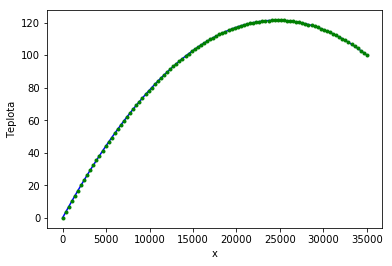

In [9]:
plot(x, t, 'b', x, ta, 'g.')
xlabel('x')
ylabel('Teplota');